<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DataAnalysis_0_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Correlation?
- **Definition**: Correlation is a statistical measure that quantifies the degree to which a change in one variable predicts a change in another variable.
- **Range**: The correlation coefficient ranges from -1 to 1.
  - **+1**: Perfect positive correlation. As one variable increases, the other variable increases proportionally.
  - **-1**: Perfect negative correlation. As one variable increases, the other variable decreases proportionally.
  - **0**: No correlation. There is no linear relationship between the variables.

### Types of Correlation:
- **Pearson Correlation**: Measures the linear relationship between two continuous variables. It is sensitive to outliers.
- **Spearman Correlation**: Measures the monotonic relationship (not necessarily linear) between two continuous or ordinal variables. It is less sensitive to outliers and skewed distributions.
- **Kendall Tau Correlation**: Measures the strength and direction of association between two ordinal variables.





### Why Correlation Matters

**In Data Analysis**:
- **Identifying Relationships**: Correlation helps identify relationships between variables, which is crucial for understanding the data structure.
- **Feature Selection**: Helps in selecting features that have strong relationships with the target variable, improving model accuracy.

**In Machine Learning**:
- **Multicollinearity Detection**: High correlation between predictor variables can lead to multicollinearity, which can affect the stability and interpretability of regression models. Detecting and addressing multicollinearity is crucial for building robust models.
- **Model Selection and Performance**:
  - **Linear Models**: Correlation is fundamental in linear regression, as it assumes a linear relationship between predictors and the target variable.
  - **Feature Engineering**: Identifying highly correlated features can guide the creation of interaction terms or polynomial features.
  - **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) use correlation to transform correlated features into a set of uncorrelated components, reducing dimensionality while retaining most of the variance.
- **Overfitting and Underfitting**: Understanding correlation helps in balancing the complexity of the model to avoid overfitting or underfitting.


### Practical Considerations

1. **Positive and Negative Correlation**:
   - **Positive Correlation**: Variables move in the same direction. For example, as temperature increases, ice cream sales may also increase.
   - **Negative Correlation**: Variables move in opposite directions. For example, as temperature increases, the sales of hot beverages may decrease.

2. **Spurious Correlation**:
   - Correlation does not imply causation. Sometimes variables may be correlated due to coincidence or the presence of a third, confounding variable.

3. **Visualizing Correlation**:
   - **Scatter Plots**: Visualize the relationship between two variables.
   - **Heatmaps**: Display correlation matrices to show the correlation coefficients between multiple variables.
   - **Pair Plots**: Provide a grid of scatter plots for all pairs of variables, offering a comprehensive view of relationships.

### Importance of Correlation in Machine Learning

- **Feature Selection**: Helps identify relevant features that significantly impact the target variable, improving model performance and reducing computational complexity.
- **Understanding Data**: Provides insights into the underlying structure and relationships within the data, guiding data preprocessing and transformation steps.
- **Model Diagnostics**: Assists in diagnosing and mitigating issues like multicollinearity, ensuring that models are stable and interpretable.

By understanding and leveraging correlation, data scientists and machine learning practitioners can make informed decisions about feature selection, model design, and data preprocessing, ultimately leading to more accurate and robust models.

In [23]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the dataset
data = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = data.frame

# Display information about the dataset
print(df.info())

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['category']).columns

df['education-num'] = df['education-num'].astype('category')
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None
Numerical features: Index(['age', 'fnlwgt', 'educatio

# Visualizations

### Heatmap

Correlation Matrix:
                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076628       0.030940      0.077229      0.056944   
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
education-num   0.030940 -0.038761       1.000000      0.125146      0.080972   
capital-gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
capital-loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
hours-per-week  0.071558 -0.013519       0.143689      0.082157      0.054467   

                hours-per-week  
age                   0.071558  
fnlwgt               -0.013519  
education-num         0.143689  
capital-gain          0.082157  
capital-loss          0.054467  
hours-per-week        1.000000  


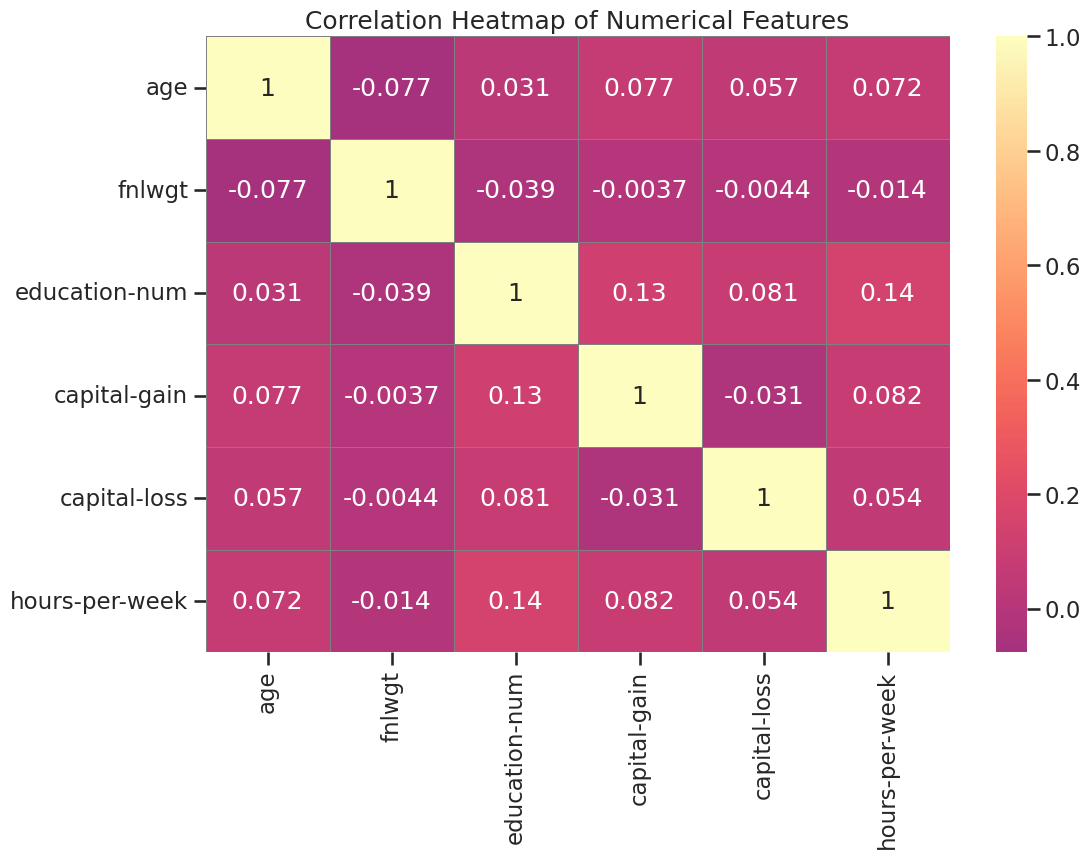

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set the context and style for the heatmap
context = 'talk'
style = 'ticks'
sns.set_context(context)
sns.set_style(style)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Highly correlated pairs

In [81]:
# Highlight highly correlated pairs
threshold = 0.1
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)].stack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
print(f"Highly Correlated Pairs (Threshold = {threshold}):\n")
print(high_corr_pairs)

Highly Correlated Pairs (Threshold = 0.1):

        Variable1       Variable2  Correlation
0   education-num    capital-gain     0.125146
1   education-num  hours-per-week     0.143689
2    capital-gain   education-num     0.125146
3  hours-per-week   education-num     0.143689


###Scatter Matrix

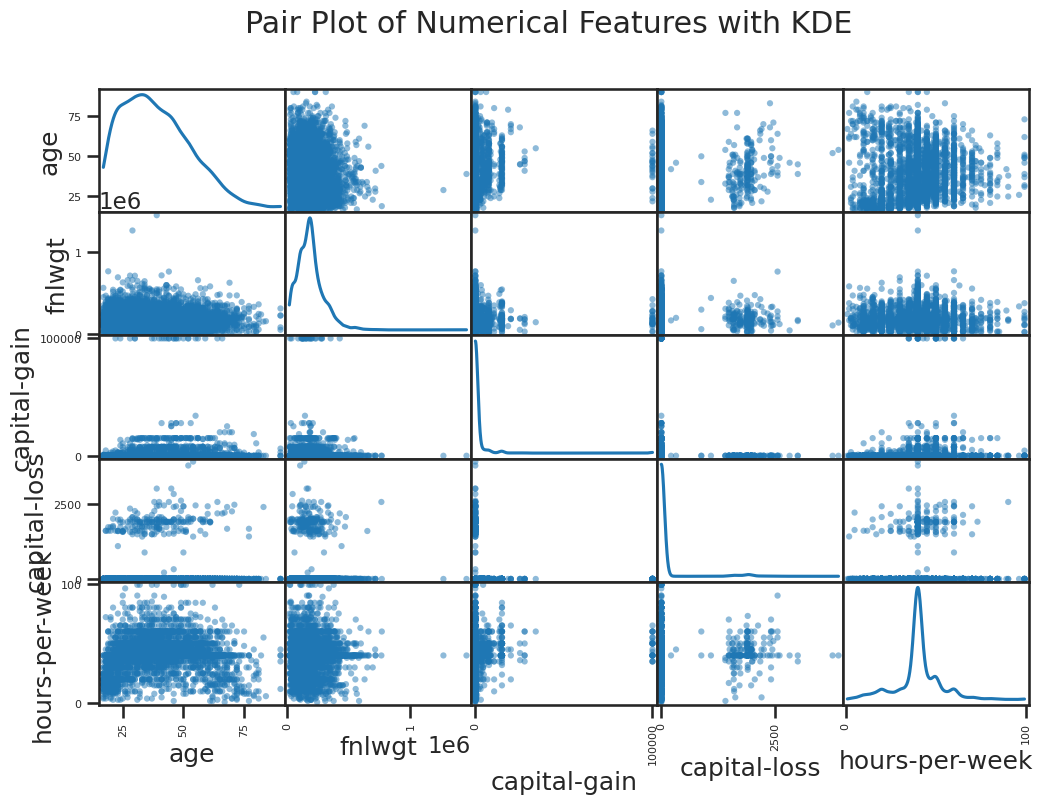

In [51]:
from pandas.plotting import scatter_matrix

# Sample the dataset to reduce computation time for pairplot
sampled_df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Create the scatter matrix plot
scatter_matrix(sampled_df[numeric_cols], figsize=(12, 8), diagonal='kde')
plt.suptitle('Pair Plot of Numerical Features with KDE')
plt.show()

### Pair Plot

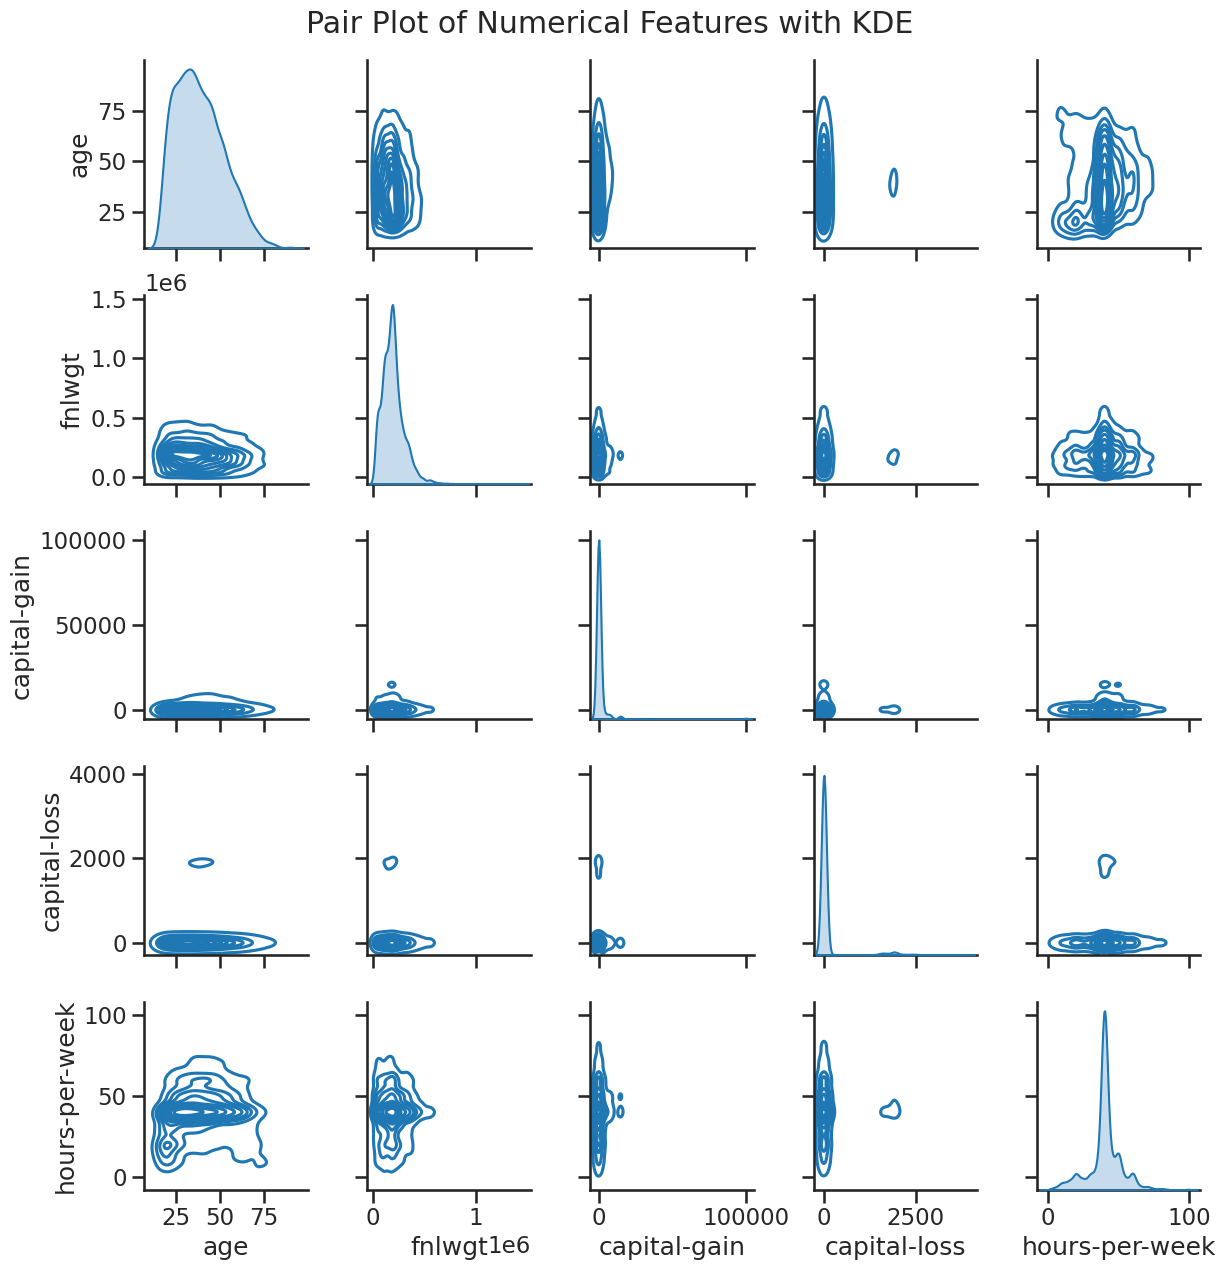

In [37]:
# Sample the dataset to reduce computation time for pairplot
sampled_df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Create a pair plot for the sampled data with KDE plots
sns.pairplot(sampled_df[numerical_features], kind="kde")
plt.suptitle('Pair Plot of Numerical Features with KDE', y=1.02)
plt.show()

###Pair Plot - Color by Category

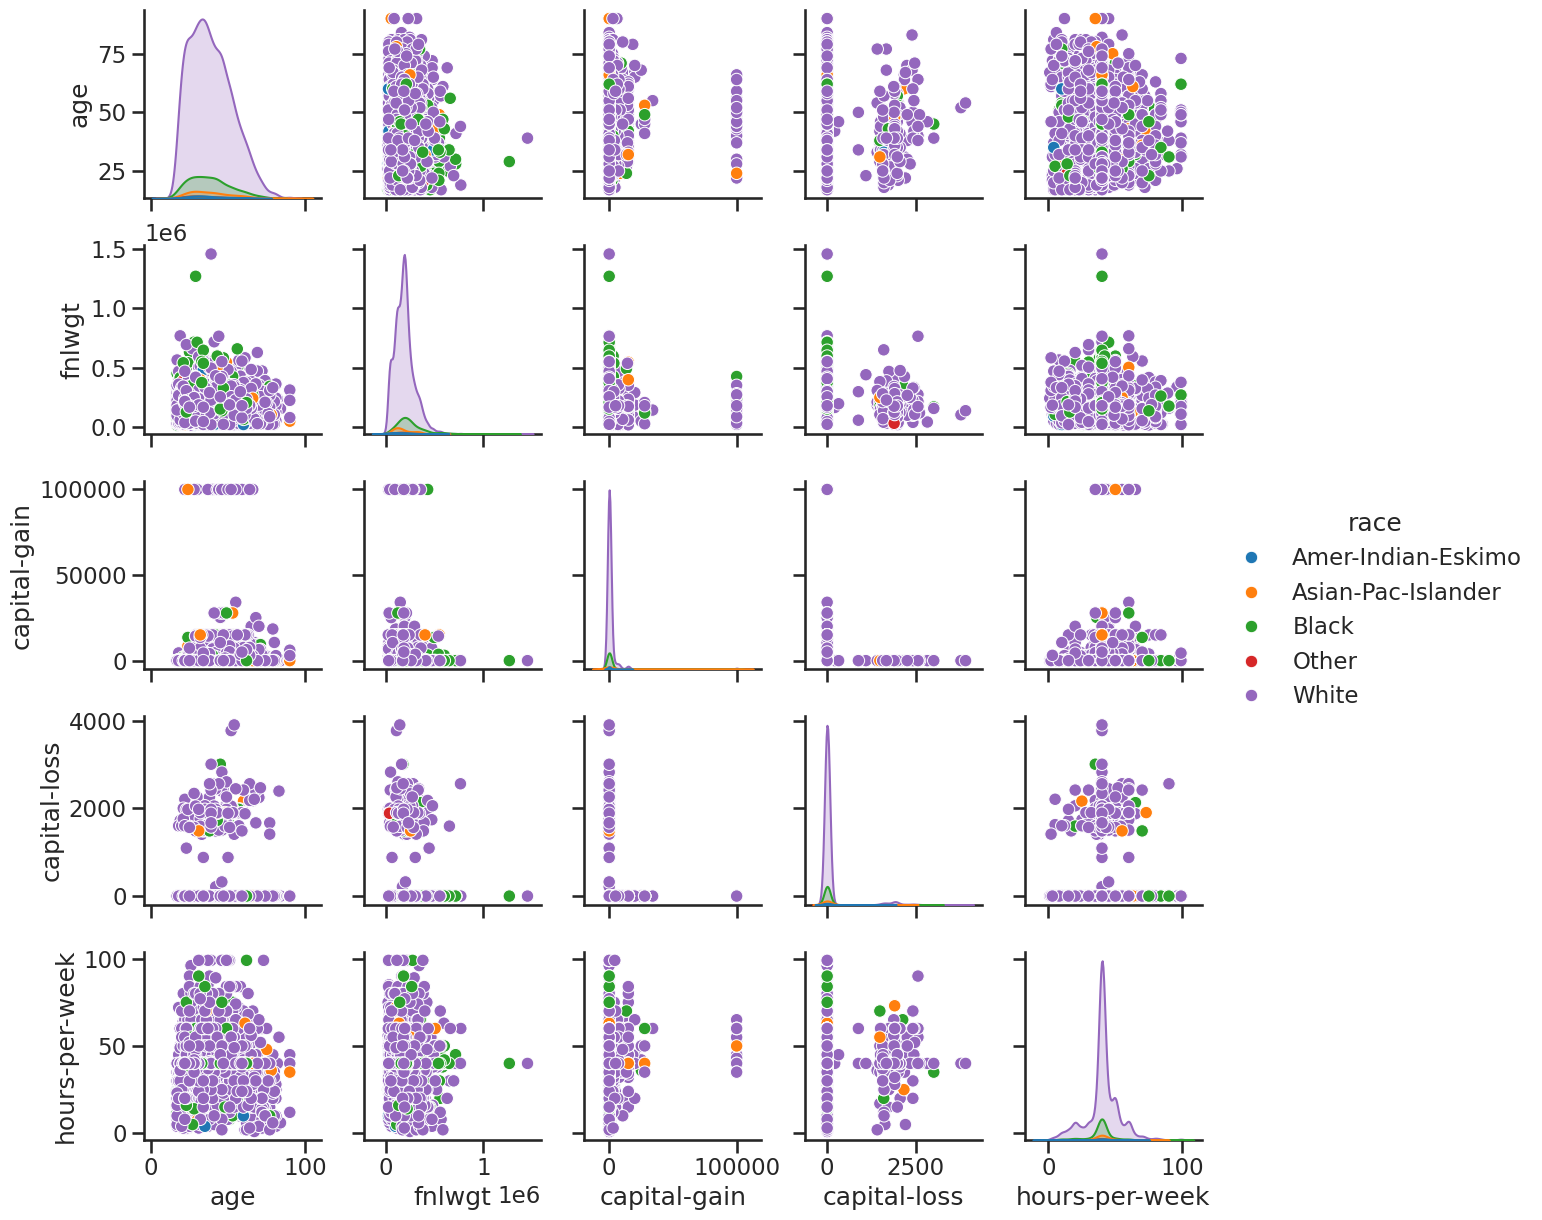

In [49]:
# Sample the dataset to reduce computation time for pairplot
sampled_df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed
data = pd.concat([sampled_df[numerical_features], sampled_df['race']], axis=1)

sns.pairplot(data, hue='race')
plt.show()

###Correlation with Target Variable

Correlation with Target Variable 'Income':
fnlwgt            1.000000
capital-gain     -0.003706
capital-loss     -0.004366
hours-per-week   -0.013519
education-num    -0.038761
age              -0.076628
Name: fnlwgt, dtype: float64


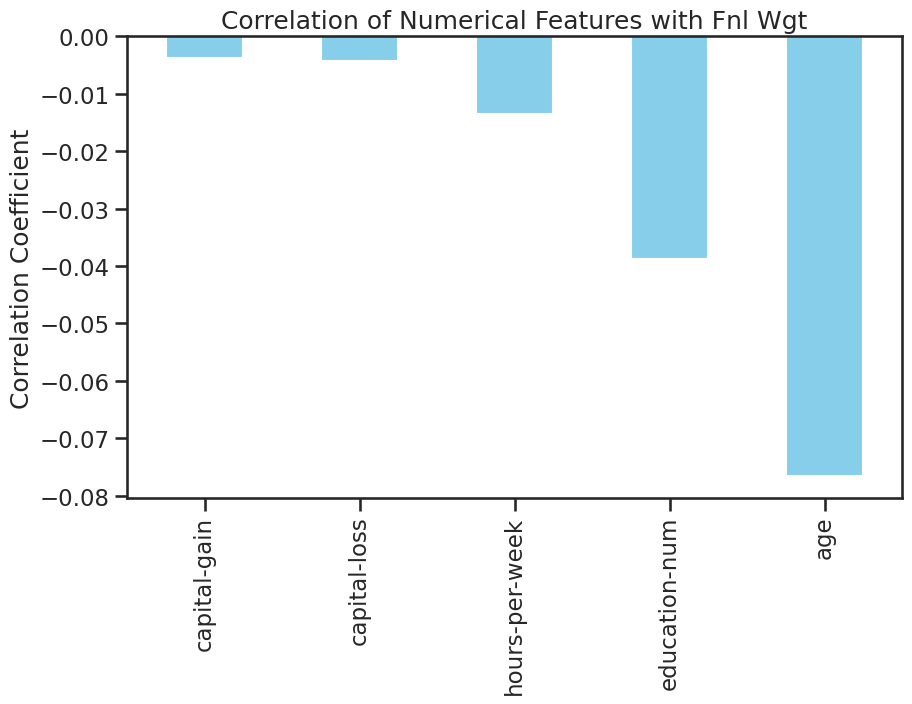

In [77]:
# Compute correlation with target variable
target_correlation = df[numerical_features].corr()['fnlwgt'].sort_values(ascending=False)
print("Correlation with Target Variable 'Income':")
print(target_correlation)

# Bar plot of correlation with target variable
plt.figure(figsize=(10, 6))
target_correlation.drop('fnlwgt').plot(kind='bar', color='skyblue')
plt.title('Correlation of Numerical Features with Fnl Wgt')
plt.ylabel('Correlation Coefficient')
plt.show()